In [153]:
%matplotlib inline
import pandas as pd
import numpy as np
from atpy import bellhop
import matplotlib.pyplot as plt
from matplotlib import gridspec
import os
import datetime as d
import pytz

In [154]:
loadName = '/Users/edwardlrichards/cir_processing/Enviornment/processedData/soundSpeedProfile.pic'
filesDir = '/Users/edwardlrichards/cir_processing/bellhopFiles/envC'
ctdData = pd.read_pickle(loadName)
# bellName = 'ctdCast_J176_1922_C'
bellName = 'ctdCast_J187_0723_C'
bellName = 'ctdCast_J185_0230_C'
bellName = 'ctdCast_J184_2137_C'
bellName = 'ctdCast_J179_1654_C'
bellFile = os.path.join(filesDir, bellName)
HST = pytz.timezone('US/Hawaii')

In [155]:
with open(bellFile+'.shd') as f:
    numRec = np.fromfile(f,dtype=np.int32, count=1)[0]
    f.seek(2 * 4 * numRec, 0)
    
    freq = np.fromfile(f, dtype=np.float32, count=1)[0]
    nTheta = np.fromfile(f, dtype=np.int32, count=1)[0]
    nsd = np.fromfile(f, dtype=np.int32, count=1)[0]
    nrd = np.fromfile(f, dtype=np.int32, count=1)[0]
    nrr = np.fromfile(f, dtype=np.int32, count=1)[0]
    attn = np.fromfile(f, dtype=np.float32, count=1)[0]
    
    f.seek(3 * 4 * numRec, 0)
    theta = np.fromfile(f, dtype=np.float32, count=nTheta)
    
    f.seek(4 * 4 * numRec, 0)
    sd = np.fromfile(f, dtype=np.float32, count=nsd)
    
    f.seek(5 * 4 * numRec, 0)
    rd = np.fromfile(f, dtype=np.float32, count=nrd)
    
    f.seek(6 * 4 * numRec, 0)
    rr = np.fromfile(f, dtype=np.float32, count=nrr)
    
    pressure = []
    for i in range(nrd):
        recnum = 7 + i
        f.seek(recnum * 4 * numRec, 0)
        temp = np.fromfile(f, dtype=np.float32, count = 2 * nrr)
        pressure.append(temp[0::2] + 1j * temp[1::2])
    pressure = np.array(pressure)
Z, R = np.meshgrid(rd, rr/1e3)
TL = 20 * np.log10(np.abs(pressure) + np.spacing(1)).T

In [156]:
prof = bellhop.readEnv(bellFile)

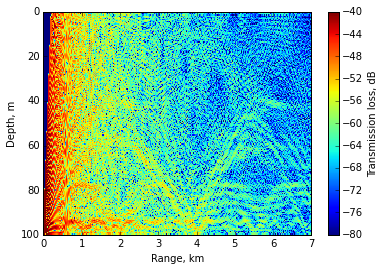

In [157]:
Z, R = np.meshgrid(rd, rr/1e3)
_ = plt.pcolormesh(R, Z, TL)
_ = plt.clim(-80,-40)
cb = plt.colorbar()
_ = cb.set_label('Transmission loss, dB')
_ = plt.ylim(100, 0)
plt.ylabel('Depth, m')
_ = plt.xlabel('Range, km')

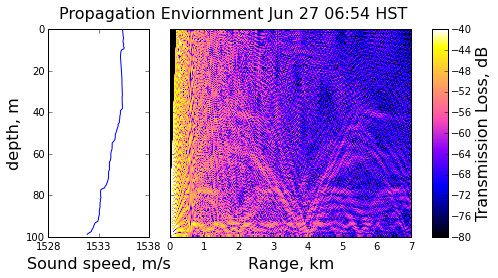

In [158]:
depthMax = 100
fig = plt.figure(figsize=(8, 4)) 
gs = gridspec.GridSpec(100,100,bottom=0.18,left=0.18,right=0.88) 

ax1 = plt.subplot(gs[:,:25])

_ = ax1.plot(prof['c'], prof.index)
# _ = ax1.set_xlim(1480, 1545)
_ = ax1.set_ylim(depthMax, 0)
ax1.set_xticks(np.r_[1528:1538:3j])
# ax1.set_yticks([50, 100, 150, 200, 250])

ax1.set_xlabel('Sound speed, m/s', fontsize=16)
ax1.set_ylabel('depth, m', fontsize=16)
# ax1.set_title('Sound speed profile', fontsize=16)

ax2 = plt.subplot(gs[:,30:90])
pcol = ax2.pcolormesh(R, Z, np.array(TL),\
                      cmap=plt.cm.get_cmap('gnuplot2'))

# ax2.plot(0.010,sD,'ro')
# ax2.plot(exRange * np.ones(sensorPosition.shape),\
#          sensorPosition.values, 'k.')

ax2.set_xlabel('Range, km', fontsize=16)
# ax2.set_xlim(-.02, np.max(rPlot) / 1e3)
ax2.set_ylim(depthMax, 0)
ax2.set_yticklabels('')
# ax2.set_title('modeled transmission', fontsize=16)

ax3 = plt.subplot(gs[:,95:99])

cbar = fig.colorbar(pcol,ax=ax2,cax=ax3)
pcol.set_clim(-80, -40)
noYear = d.datetime.strptime('1996'+bellName,'%YctdCast_J%j_%H%M_C')
utc = pytz.utc.localize(noYear)
# noYear.localize(pytz.utc)
cbar.set_label('Transmission Loss, dB', fontsize=16)
_ = plt.suptitle('Propagation Enviornment ' +\
                 utc.astimezone(HST).strftime('%b %d %H:%M') +\
                 ' HST', fontsize=16)
_ = plt.savefig('/Users/edwardlrichards/Desktop/MPL_Interns_07_01/'+bellName)